<a href="https://colab.research.google.com/github/Daimond92/python_data_science/blob/develop/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Importaciones</h1>

In [138]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, StratifiedKFold, cross_val_score, LeaveOneOut
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, roc_auc_score, PrecisionRecallDisplay, average_precision_score, classification_report
from sklearn.ensemble import RandomForestClassifier

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [83]:
archivo = 'https://raw.githubusercontent.com/Daimond92/python_data_science/refs/heads/develop/Data/prestacar.csv'

In [84]:
datos = pd.read_csv(archivo)

In [4]:
datos

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [85]:
X = datos.drop('moroso', axis=1)
y = datos['moroso']

In [86]:
modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

In [11]:
print(f'Precisión del modelo es: {modelo.score(X, y)}')

Precisión del modelo es: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [87]:
X,X_test,y,y_test = train_test_split(X,y, test_size=0.15, stratify=y, random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y, stratify=y, random_state=5)

In [88]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
print(f'Precisión del modelo de entrenamiento es:{modelo.score(X_train, y_train)}')
print(f'Precisión del modelo de validación es:{modelo.score(X_val, y_val)}')

Precisión del modelo de entrenamiento es:1.0
Precisión del modelo de validación es:0.8470516505530877


In [89]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'Precisión del modelo de entrenamiento es:{modelo.score(X_train, y_train)}')
print(f'Precisión del modelo de validación es:{modelo.score(X_val, y_val)}')

Precisión del modelo de entrenamiento es:0.9206445993031359
Precisión del modelo de validación es:0.905496036930581


### Evaluando el modelo

In [90]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[10354   125]
 [  960    42]]


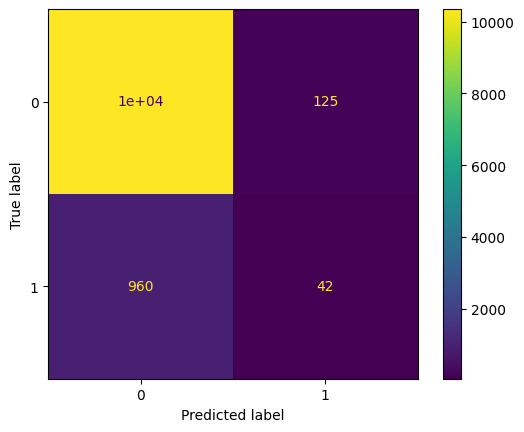

In [91]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion)
visualizacion.plot();

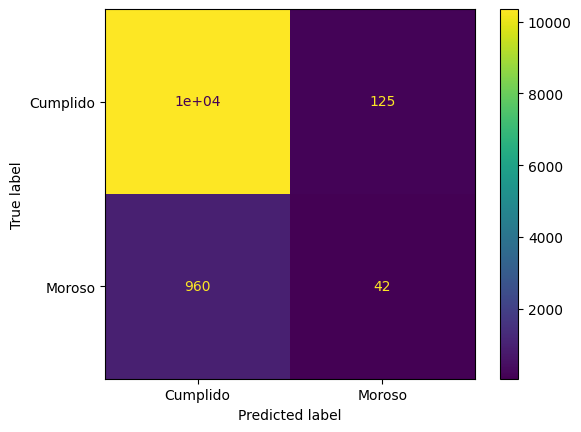

In [92]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Cumplido', 'Moroso'])
visualizacion.plot();

In [93]:
modelo_random = RandomForestClassifier(max_depth = 10)
modelo_random.fit(X_train, y_train)
print(f'Precisión del modelo random de entrenamiento: {modelo_random.score(X_train, y_train)}')
print(f'Precisión del modelo random de validación: {modelo_random.score(X_val, y_val)}')

Precisión del modelo random de entrenamiento: 0.9152148664343787
Precisión del modelo random de validación: 0.9128995732079087


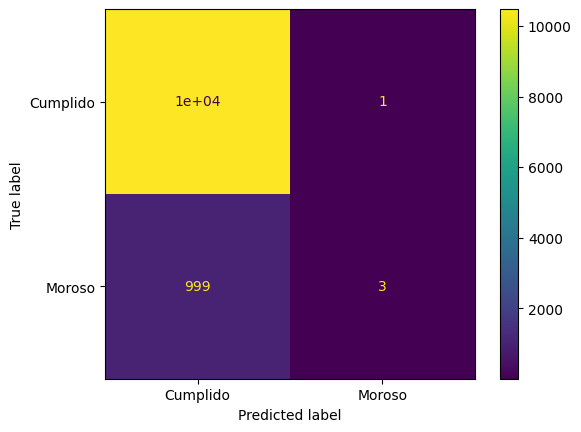

In [94]:
y_previsto_random = modelo_random.predict(X_val)
matriz_confusion_random = confusion_matrix(y_val, y_previsto_random)
visualizacion_random = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion_random,
                                      display_labels = ['Cumplido', 'Moroso'])
visualizacion_random.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [40]:
45/(45+123)

0.26785714285714285

In [95]:
print(f'La precisión del modelo es: {precision_score(y_val, y_previsto)}')
print(f'La sensibilidad (Recall) del modelo es: {recall_score(y_val, y_previsto)}')
print(f'La exactitud (Accuracy) del modelo es: {accuracy_score(y_val, y_previsto)}')
print(f'El f1 score del modelo es: {f1_score(y_val, y_previsto)}')

La precisión del modelo es: 0.25149700598802394
La sensibilidad (Recall) del modelo es: 0.041916167664670656
La exactitud (Accuracy) del modelo es: 0.905496036930581
El f1 score del modelo es: 0.0718562874251497


### Curva ROC

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




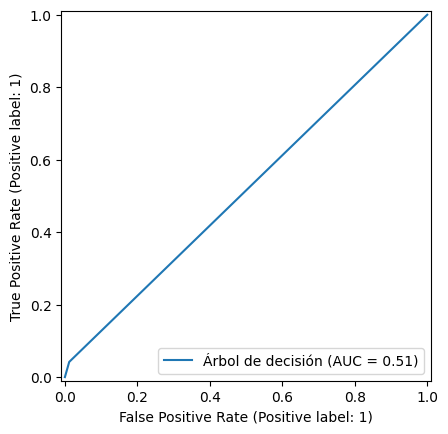

In [96]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árbol de decisión');

In [97]:
print(f'El Área bajo la curva ROC es: {roc_auc_score(y_val, y_previsto)}')

El Área bajo la curva ROC es: 0.5149937742608114


### Curva de  precisión x sensibilidad

In [ ]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


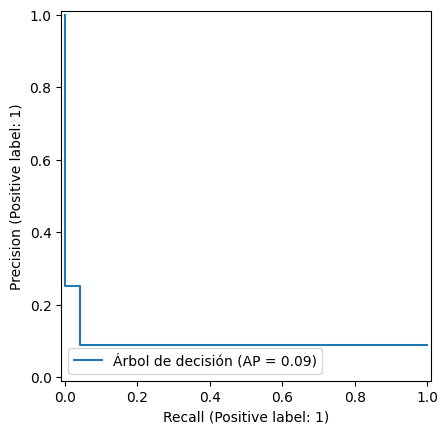

In [98]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árbol de decisión');

In [99]:
print(f'El score promedio de precisión vs recall es: {average_precision_score(y_val, y_previsto)}')

El score promedio de precisión vs recall es: 0.09415820039056431


### Informe de métricas

In [100]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [102]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
resultados = cross_validate(modelo, X, y, cv = kf)
resultados

{'fit_time': array([0.2281177 , 0.23076034, 0.22465348, 0.22763085, 0.23800778]),
 'score_time': array([0.00343466, 0.003407  , 0.00335312, 0.00367713, 0.00335813]),
 'test_score': array([0.91290147, 0.90766551, 0.90766551, 0.9135453 , 0.89917247])}

In [103]:
resultados['test_score']

array([0.91290147, 0.90766551, 0.90766551, 0.9135453 , 0.89917247])

In [105]:
promedio = resultados['test_score'].mean()
desviacion = resultados['test_score'].std()
print(f'El promedio de la precisión del modelo es: {promedio}')
print(f'La desviación estándar de la precisión del modelo es: {desviacion}')
print(f'El intervalo de confianza del modelo es: [{promedio - 2*desviacion}, {min(promedio + 2*desviacion,1)}]')

El promedio de la precisión del modelo es: 0.9081900500551005
La desviación estándar de la precisión del modelo es: 0.005152535524773839
El intervalo de confianza del modelo es: [0.8978849790055528, 0.9184951211046481]


### Validación cruzada con sensibilidad

In [106]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desviacion = resultados['test_score'].std()
  return f'El intervalo de confianza del modelo es: [{promedio - 2*desviacion}, {min(promedio + 2*desviacion,1)}]'

In [107]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
resultados = cross_validate(modelo, X, y, cv = kf, scoring='recall')
resultados

{'fit_time': array([0.24180746, 0.22684455, 0.23192215, 0.22775388, 0.23657131]),
 'score_time': array([0.00583291, 0.00635719, 0.00571108, 0.00718784, 0.00578237]),
 'test_score': array([0.02509908, 0.01856436, 0.01845018, 0.0156658 , 0.02543353])}

In [108]:
intervalo_confianza(resultados)

'El intervalo de confianza del modelo es: [0.012808942294728192, 0.028476233141640883]'

In [111]:
modelo_metricas = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo_metricas, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([0.2322309 , 0.22590208, 0.23713017, 0.22731066, 0.22791052]),
 'score_time': array([0.0120542 , 0.01212478, 0.01228571, 0.01181459, 0.01220059]),
 'test_accuracy': array([0.91257485, 0.90733885, 0.90712108, 0.91365418, 0.89928136]),
 'test_recall': array([0.02906209, 0.01980198, 0.02091021, 0.01436031, 0.02543353]),
 'test_precision': array([0.24444444, 0.21333333, 0.22972973, 0.2244898 , 0.21153846]),
 'test_f1': array([0.05194805, 0.03624009, 0.03833145, 0.02699387, 0.04540764])}

In [112]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')

In [113]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.8977911952825697, 0.9181969329905009]
Intervalo de confianza(test_recall): [0.011873359445508696, 0.031953886880035295]
Intervalo de confianza(test_precision): [0.20074697931588495, 0.24866732666984967]
Intervalo de confianza(test_f1): [0.022864499048746618, 0.056703940414586554]


### Estratificando los datos

In [114]:
datos['moroso'].value_counts()

,count
moroso,
0,49309
1,4716


In [116]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
resultados = cross_validate(modelo, X, y, cv = skf, scoring='recall')

In [117]:
intervalo_confianza(resultados)

'El intervalo de confianza del modelo es: [0.020444277334630185, 0.03891979687435422]'

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

### Pipeline para validación

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

### Probando el modelo

# Ejercicios

## Parte 1

1. Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

In [118]:
archivo_diabetes = 'https://raw.githubusercontent.com/Daimond92/python_data_science/refs/heads/develop/Data/diabetes.csv'

In [119]:
df = pd.read_csv(archivo_diabetes)

In [31]:
df.head()

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


2. Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [120]:
X_d = df.drop('diabetes', axis = 1)
y_d = df['diabetes']

In [121]:
x, x_prueba, y, y_prueba = train_test_split(X_d, y_d, stratify = y_d, test_size = 0.05, random_state = 5)
x_entrenamiento, x_val, y_entrenamiento, y_val = train_test_split(X_d, y_d, stratify = y_d, random_state = 5)

3. La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

In [122]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

In [123]:
arbol.fit(x_entrenamiento, y_entrenamiento)
print(f'Precisión de entrenamiento: {arbol.score(x_entrenamiento, y_entrenamiento)}')
print(f'Precisión de prueba: {arbol.score(x_val, y_val)}')

Precisión de entrenamiento: 0.7830508474576271
Precisión de prueba: 0.6868686868686869


In [124]:
random_forest.fit(x_entrenamiento, y_entrenamiento)
print(f'Precisión de entrenamiento: {random_forest.score(x_entrenamiento, y_entrenamiento)}')
print(f'Precisión de prueba: {random_forest.score(x_val, y_val)}')

Precisión de entrenamiento: 0.7491525423728813
Precisión de prueba: 0.6363636363636364


4. La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

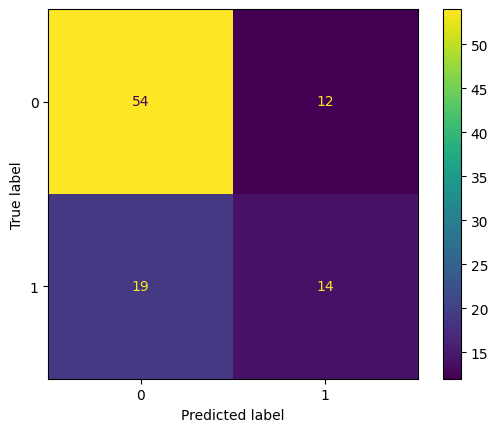

In [125]:
prediccion_arbol = arbol.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_arbol);

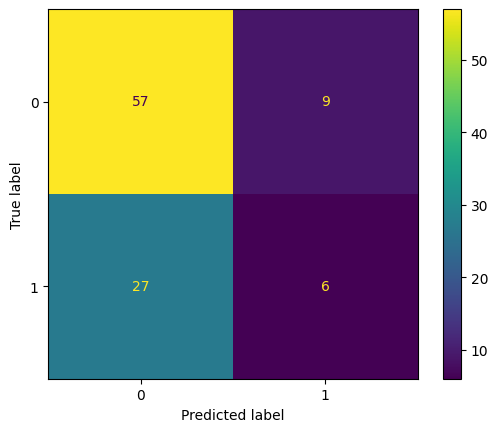

In [126]:
prediccion_rf = random_forest.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_rf);

## Parte 2

1. Para una evaluación completa de un modelo de clasificación, podemos explorar métricas que evalúan la tasa de acierto general y también para cada clase de la variable objetivo de forma individual. Extrae las métricas de precisión, recall, precisión y F1-Score de los modelos de clasificación generados en el desafío de la clase 1. La biblioteca Scikit-Learn tiene funciones para calcular cada una de las métricas, solo necesitas importar y utilizar como parámetros los valores reales y previstos por el modelo.

In [127]:
prevision_arbol = arbol.predict(x_val)

print(f'Precisión (Decision Tree): {accuracy_score(y_val, prevision_arbol)}')
print(f'Recall (Decision Tree): {recall_score(y_val, prevision_arbol)}')
print(f'Precisión (Decision Tree): {precision_score(y_val, prevision_arbol)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val, prevision_arbol)}')

Precisión (Decision Tree): 0.6868686868686869
Recall (Decision Tree): 0.42424242424242425
Precisión (Decision Tree): 0.5384615384615384
F1_Score (Decision Tree): 0.4745762711864407


In [128]:
prevision_rf = random_forest.predict(x_val)

print(f'Precisión (Random Forest): {accuracy_score(y_val, prevision_rf)}')
print(f'Recall (Random Forest): {recall_score(y_val, prevision_rf)}')
print(f'Precisión (Random Forest): {precision_score(y_val, prevision_rf)}')
print(f'F1_Score (Random Forest): {f1_score(y_val, prevision_rf)}')

Precisión (Random Forest): 0.6363636363636364
Recall (Random Forest): 0.18181818181818182
Precisión (Random Forest): 0.4
F1_Score (Random Forest): 0.25


2. Además de métricas numéricas, se pueden explorar gráficos para evaluar el rendimiento de un modelo y comprender si puede diferenciar bien una clase de otra. Obtén la curva ROC y la métrica AUC de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva ROC se puede generar usando el método RocCurveDisplay.from_predictions.

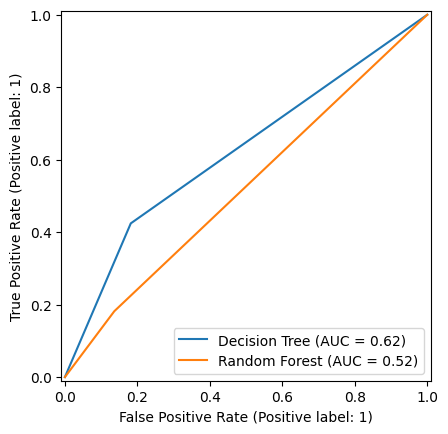

In [129]:
curva_roc = RocCurveDisplay.from_predictions(y_val, prevision_arbol, name = 'Decision Tree')
curva_roc = RocCurveDisplay.from_predictions(y_val, prevision_rf, name = 'Random Forest', ax = curva_roc.ax_)

In [130]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, prevision_arbol)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, prevision_rf)}')

AUC (Decision Tree): 0.6212121212121211
AUC (Random Forest): 0.5227272727272727


3. Además de la curva ROC, la curva de precisión x recall se puede usar para evaluar el rendimiento de modelos, siendo más interesante para datos desbalanceados. Obtén la curva de precisión x recall y la métrica AP de los modelos de clasificación generados en el desafío de la clase 1, comparando las curvas en el mismo gráfico. La curva de precisión x recall se puede generar usando el método PrecisionRecallDisplay.from_predictions.

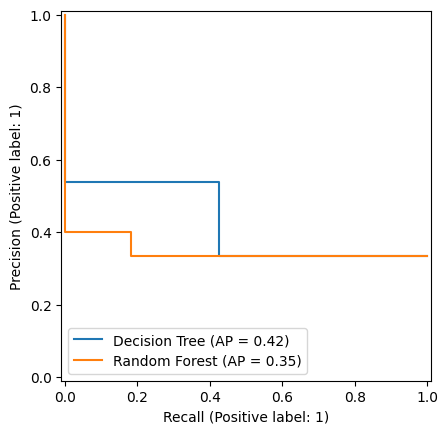

In [131]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prevision_arbol, name = 'Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, prevision_rf, name = 'Random Forest', ax = curva_precision_recall.ax_)

In [132]:
print(f'AP (Decision Tree): {average_precision_score(y_val, prevision_arbol)}')
print(f'AP (Random Forest): {average_precision_score(y_val, prevision_rf)}')

AP (Decision Tree): 0.4203574203574203
AP (Random Forest): 0.34545454545454546


4. Un resumen de las principales métricas de clasificación puede ser muy útil para resumir la información y generar insights de forma rápida. Genera los informes de métricas de los modelos de clasificación construidos en el desafío de la clase 1. El informe de métricas se puede generar a partir de la función classification_report de la biblioteca Scikit-Learn.

In [133]:
print('Decision Tree')
print(classification_report(y_val, prevision_arbol))
print('Random Forest')
print(classification_report(y_val, prevision_rf))

Decision Tree
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        66
           1       0.54      0.42      0.47        33

    accuracy                           0.69        99
   macro avg       0.64      0.62      0.63        99
weighted avg       0.67      0.69      0.68        99

Random Forest
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        66
           1       0.40      0.18      0.25        33

    accuracy                           0.64        99
   macro avg       0.54      0.52      0.51        99
weighted avg       0.59      0.64      0.59        99



## Parte 3

1. En el proceso de validación cruzada, se generan diferentes modelos para cada división realizada en los datos y, en consecuencia, diferentes valores de métricas de evaluación. Para encontrar un resultado promedio de las métricas, se puede construir un intervalo de confianza a partir de la media y la desviación estándar de las métricas. Crea una función para calcular el intervalo de confianza de los resultados de una validación cruzada con 2 desviaciones estándar. La función necesita 2 parámetros: uno para recibir una lista con los resultados de las métricas de la validación cruzada y otro para recibir el nombre del algoritmo. Para generar el intervalo de confianza, extrae la media de los resultados de la lista y la desviación estándar. El intervalo de confianza debe ser presentado en un print con el valor mínimo siendo la media restada de 2 desviaciones estándar y el valor máximo siendo la media sumada de 2 desviaciones estándar. Ejemplo de retorno de la función:

```Python
Intervalo de confianza ("nombre del modelo"): ["valor mínimo del intervalo", "valor máximo del intervalo"]
```

In [134]:
def intervalo_conf(resultados, nombre_modelo):
    media = resultados.mean()
    desvio_estandar = resultados.std()
    print(f'Intervalo de confianza ({nombre_modelo}): [{media - 2*desvio_estandar}, {min(media + 2*desvio_estandar, 1)}]')

2. KFold es la estrategia más simple de validación cruzada, que permite la división aleatoria de los datos en k partes, siendo utilizada una parte para validación y el resto para entrenamiento del modelo. El proceso de creación de modelos se repite hasta que todas las partes son utilizadas como validación. Sabiendo esto, evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada con el método KFold, usando 10 partes, con el uso del parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle. Usa el método cross_val_score que no retorna el tiempo de ejecución, solo las métricas.

In [136]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, x, y, cv = kf)
resultado_rf = cross_val_score(random_forest, x, y, cv = kf)

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.5292910838089362, 0.8675794709563556]
Intervalo de confianza (Random Forest): [0.5913022032374055, 0.7663080385833626]


3. En el proceso de división de datos con el KFold aleatorio, puede ser que la proporción de cada categoría de la variable objetivo no se mantenga en cada una de las partes de los datos. Para mantener esa proporción en cada una de las partes, podemos utilizar el KFold estratificado, haciendo que el proceso de validación de datos sea mucho más consistente. Evalúa el desempeño de los modelos con un intervalo de confianza utilizando la validación cruzada (cross_val_score) con el método StratifiedKFold, usando el parámetro n_splits y mezclando los datos antes de la separación con el parámetro shuffle y evaluando la métrica F1-Score usando el parámetro scoring.

In [137]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arbol = cross_val_score(arbol, x, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, x, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arbol, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confianza (Decision Tree): [0.271659875902482, 0.7462406274736961]
Intervalo de confianza (Random Forest): [0.13601780103687625, 0.5940644591746073]


4. En conjuntos de datos con pocos registros (pocas filas), las estrategias de separación de los datos para validación pueden hacer que quede poca información en los datos de entrenamiento, haciendo que el modelo no comprenda bien el patrón de los datos. El LeaveOneOut es una estrategia para sortear este problema, utilizando solo un registro como dato de validación. Evalúa el desempeño de los modelos utilizando la validación cruzada (cross_val_score) con el método LeaveOneOut.

  - El método LeaveOneOut generará un modelo para cada una de las filas de la base de datos, por lo tanto, la lista de resultados tendrá tasa de acierto solo de 0 o 1 para cada modelo. De esta forma, extrae solo la media del resultado con el método mean(), sin utilizar el intervalo de confianza.

In [139]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arbol = cross_val_score(arbol, x, y, cv = loo)
resultado_rf = cross_val_score(random_forest, x, y, cv = loo)

print(f'Precisión media (Decision Tree): {resultado_arbol.mean()}')
print(f'Precisión media (Random Forest):{resultado_rf.mean()}')

Precisión media (Decision Tree): 0.7085561497326203
Precisión media (Random Forest):0.7085561497326203
